# Introduction
This code performs a comparison of different machine learning algorithms on a dataset. The dataset used in this comparison is the Iris dataset which contains measurements of different features of Iris flowers. The goal of this analysis is to classify the species of Iris flowers based on their measurements.

# Loading the neccesary libraries
These lines import the necessary modules from scikit-learn that we will be using in our code, including the iris dataset, several classifiers, accuracy_score for evaluating model performance, train_test_split for splitting the dataset, and more.

In [412]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [413]:
iris=load_iris()
print(iris.feature_names)
print(iris.target_names)
print(f'Data\n {iris.data}')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
Data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 

In [414]:
test_size=0.4

# Data visualization

In [415]:
# Create a pandas dataframe from the data
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [416]:
# Calculate the summary statistics for each feature in each class
summary_stats = df.groupby('target').agg(['mean', 'std', 'min', 'max']).T
print(summary_stats)

target                       0.0       1.0       2.0
sepal length (cm) mean  5.006000  5.936000  6.588000
                  std   0.352490  0.516171  0.635880
                  min   4.300000  4.900000  4.900000
                  max   5.800000  7.000000  7.900000
sepal width (cm)  mean  3.428000  2.770000  2.974000
                  std   0.379064  0.313798  0.322497
                  min   2.300000  2.000000  2.200000
                  max   4.400000  3.400000  3.800000
petal length (cm) mean  1.462000  4.260000  5.552000
                  std   0.173664  0.469911  0.551895
                  min   1.000000  3.000000  4.500000
                  max   1.900000  5.100000  6.900000
petal width (cm)  mean  0.246000  1.326000  2.026000
                  std   0.105386  0.197753  0.274650
                  min   0.100000  1.000000  1.400000
                  max   0.600000  1.800000  2.500000


In [417]:

# Plot the pairplot to visualize the relationships between the features and the target classes
sns.pairplot(df, hue='target')
plt.show()

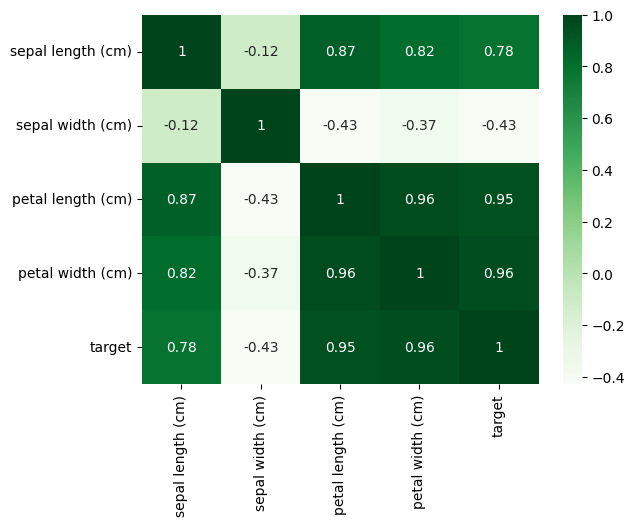

In [ ]:
# Calculating and plotting the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.show()

# Using Decision Tree Classifier

This loads the iris dataset and splits it into training and test sets using train_test_split. We set the random_state to 42 to ensure reproducibility of the results.

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=test_size, random_state=42)


This creates an instance of the DecisionTreeClassifier and fits it to the training data. We then use the fitted model to make predictions on the test data and print the predicted labels, actual labels, and the accuracy score.

In [ ]:
# Create a Decision Tree Classifier object
#creating the model
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Use the model to make predictions on the test data
y_pred = dt.predict(X_test)
print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

# Using Naive Bayes
This creates an instance of the Gaussian Naive Bayes classifier and fits it to the training data. We then use the fitted model to make predictions on the test data and print the accuracy score.

In [ ]:
# Load the iris dataset

X = iris.data
y = iris.target

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:
# Create a Naive Bayes classifier
clf = GaussianNB()

In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


# Using KNN with uniform weighting scheme
This creates an instance of the K-Nearest Neighbors classifier with k=3 and fits it to the training data. We then use the fitted model to make predictions on the test data and print the accuracy score.

In [ ]:
X = iris.data
y = iris.target


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:

# Create a k-NN classifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Train the classifier on the training data
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Use the trained classifier to make predictions on the testing data
y_pred = KNN.predict(X_test)
print(y_pred)
print(y_test)



[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]


In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


# Using KNN with distance weighting scheme

In [ ]:
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:

# Create a KNN classifier with distance weights
clf = KNeighborsClassifier(weights='distance')

In [ ]:
# Train the classifier on the training data
clf.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [ ]:

# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test)


In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


# Using Random Forest
This creates an instance of the Random Forest classifier and fits it to the training data. We then use the fitted model to make predictions on the test data and print the accuracy score.

In [ ]:
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier on the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Use the trained classifier to make predictions on the testing data
y_pred = rfc.predict(X_test)

In [ ]:

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9833333333333333


# Using SVM
This creates an instance of the Support Vector Machine classifier with a linear kernel and fits it to the training data. We then use the fitted model to make predictions on the test data and print the accuracy score.

In [ ]:
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [ ]:

# Create an SVM classifier
svm = SVC(kernel='linear', C=1)

In [ ]:
# Train the classifier on the training data
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Use the trained classifier to make predictions on the testing data
y_pred = clf.predict(X_test)


In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


# Conclusion
The following algorithms were used in the project
Decision Tree, Naive Bayes, KNN, Random Forest, SVM

At test_size=0.2 equivalent to 20% of the whole data, all the five algorithms shows an accuracy of 1.0 (100%)
At test_size=0.3 equivalent to 30% of the whole data, all the five algorithms shows the following accuracy 1,0.9778,1,1,0.9778 respectively
At test_size=0.4 equivalent to 30% of the whole data, all the five algorithms shows the following accuracy  0.9667,0.9667,0.9833,0.9833,0.9667 respectively
KNN and Random Forest appears to be the best performing over the ranges of test data for the Iris dataset

